# ML Model

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

### Import the dataset

In [537]:
dataset = pd.read_csv('C:\\Users\\SHADOW\\Technical Seminar\\IPL\\DATASETS\\encoded.csv')
dataset

,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,inning,season,overs,runs_last5,wickets_last5,cum_runs,cum_wickets,total_runs
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.1,1,0,1,0,222
1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.2,1,0,1,0,222
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.3,2,0,2,0,222
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.4,2,0,2,0,222
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,0.5,2,0,2,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166148,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,17.6,42,2,154,4,157
166149,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.1,42,2,155,4,157
166150,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.2,42,2,156,4,157
166151,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.3,41,3,156,5,157


_Consider overs data from 5 onwards for better prediction_

In [538]:
dataset = dataset[dataset['overs'] >= 5]

In [539]:
dataset

,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,...,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,inning,season,overs,runs_last5,wickets_last5,cum_runs,cum_wickets,total_runs
32,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.1,59,0,61,0,222
33,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.2,59,1,61,1,222
34,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.3,59,1,61,1,222
35,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.4,59,1,61,1,222
36,0,0,0,0,0,0,0,0,0,0,...,1,0,1,2008,5.5,58,1,61,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166148,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,17.6,42,2,154,4,157
166149,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.1,42,2,155,4,157
166150,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.2,42,2,156,4,157
166151,0,0,0,0,0,0,1,0,0,0,...,0,0,2,2020,18.3,41,3,156,5,157


### Data Split

Split the data into training and testing sets.
_Since, this is a time series data we cant't use train_test_split()._

Features-

In [540]:
X_train = dataset.drop(labels = 'total_runs', axis=1)[dataset['season'] <= 2017]
X_test = dataset.drop(labels = 'total_runs', axis=1)[dataset['season'] >= 2018]

Predictions-

In [526]:
y_train = dataset[dataset['season'] <= 2017]['total_runs'].values
y_test = dataset[dataset['season'] >= 2018]['total_runs'].values

Drop season column which is not useful for prediction

In [527]:
X_train.drop(columns = 'season', inplace=True)
X_test.drop(columns = 'season', inplace=True)

In [528]:
print(X_train.shape)
print(X_test.shape)

(90587, 54)
(31955, 54)


In [529]:
print(y_train.shape)
print(y_test.shape)

(90587,)
(31955,)


### Standardization

In [483]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [484]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [485]:
X_train

array([[-0., -0., -0., ..., -1., -1., -2.],
       [-0., -0., -0., ..., -0., -1., -1.],
       [-0., -0., -0., ..., -0., -1., -1.],
       ...,
       [-0., -0., -0., ..., -0.,  0.,  0.],
       [-0., -0., -0., ..., -0.,  0.,  0.],
       [-0., -0., -0., ..., -0.,  0.,  0.]])

In [486]:
y_train

array([[ 2.],
       [ 2.],
       [ 2.],
       ...,
       [-2.],
       [-2.],
       [-2.]])

In [487]:
X_test

array([[-0., -0., -0., ...,  1., -2., -1.],
       [-0., -0., -0., ...,  1., -2., -1.],
       [-0., -0., -0., ...,  1., -2., -1.],
       ...,
       [-0., -0., -0., ...,  1.,  2.,  0.],
       [-0., -0., -0., ...,  2.,  2.,  1.],
       [-0., -0., -0., ...,  2.,  2.,  1.]])

In [488]:
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Function

## Model Selection

### 1. Multiple Linear Regression

In [530]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [532]:
y_pred = linear_regressor.predict(X_train)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_train.reshape(len(y_train),1))),1))

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [ ]:
cv_linear = cross_val_score(estimator = linear_regressor, X=X_train, y=y_train, cv=5)
linear_rmse = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_train)))
linear_r2_score = linear_regressor.score(X_train,y_train)

In [ ]:
linear_r2_score

In [493]:
y_pred = linear_regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[151. 165.]
 [150. 165.]
 [154. 165.]
 ...
 [165. 157.]
 [161. 157.]
 [162. 157.]]


In [494]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_test))))
print('R2_score: ', linear_regressor.score(X_test,y_test))

RMSE:  20.520093848012657
R2_score:  0.4717246627891384


C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>,
 array([[165.],
        [165.],
        [165.],
        ...,
        [157.],
        [157.],
        [157.]]))

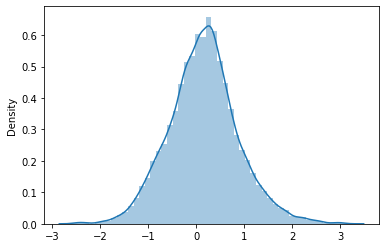

In [495]:
sns.distplot(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))

In [520]:
temp_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 7.5, 30, 1, 60, 1]
data = np.array([temp_array])
my_prediction = int(linear_regressor.predict(data)[0])
my_prediction

61161326091

### 2. Decision Tree Regression

In [503]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [504]:
y_pred = dt_regressor.predict(X_train)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_train.reshape(len(y_train),1))),1))

[[222. 222.]
 [222. 222.]
 [222. 222.]
 ...
 [111. 111.]
 [111. 111.]
 [111. 111.]]


In [505]:
cv_dt = cross_val_score(estimator = dt_regressor, X=X_train, y=y_train, cv=5)
dt_rmse = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_train)))
dt_r2_score = dt_regressor.score(X_train,y_train)

In [506]:
dt_r2_score

0.9999810507108783

In [507]:
y_pred = dt_regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[164. 165.]
 [164. 165.]
 [148. 165.]
 ...
 [169. 157.]
 [169. 157.]
 [174. 157.]]


In [508]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_test))))
print('R2_score: ', dt_regressor.score(X_test,y_test))

RMSE:  27.639816969078883
R2_score:  0.041544450780773845


C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>,
 array([[165.],
        [165.],
        [165.],
        ...,
        [157.],
        [157.],
        [157.]]))

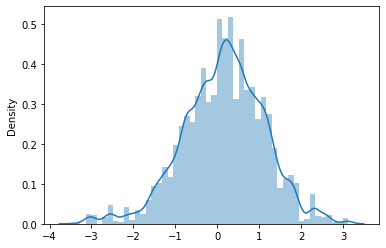

In [509]:
sns.distplot(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))

In [513]:
temp_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 7.5, 30, 1, 60, 1]
data = np.array([temp_array])
my_prediction = int(dt_regressor.predict(data)[0])
my_prediction

array([3.])

### 3. Random Forest Regression

In [514]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train, y_train)

<ipython-input-514-946cd212942c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [515]:
y_pred = rf_regressor.predict(X_train)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_train.reshape(len(y_train),1))),1))

[[217. 222.]
 [222. 222.]
 [222. 222.]
 ...
 [115. 111.]
 [111. 111.]
 [137. 111.]]


In [399]:
cv_rf = cross_val_score(estimator = rf_regressor, X=X_train, y=y_train, cv=5)
rf_rmse = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_train)))
rf_r2_score = rf_regressor.score(X_train,y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\model_s

In [516]:
y_pred = rf_regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[151. 165.]
 [151. 165.]
 [150. 165.]
 ...
 [170. 157.]
 [168. 157.]
 [168. 157.]]


In [517]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_test))))
print('R2_score: ', rf_regressor.score(X_test,y_test))

RMSE:  21.9517145696211
R2_score:  0.39544120339705147


C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>,
 array([[165.],
        [165.],
        [165.],
        ...,
        [157.],
        [157.],
        [157.]]))

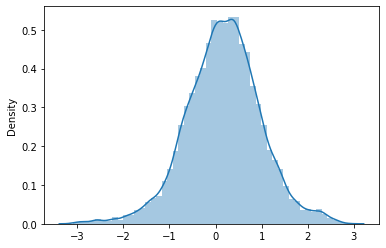

In [518]:
sns.distplot(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))

In [519]:
temp_array = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 7.5, 30, 1, 60, 1]
data = np.array([temp_array])
my_prediction = int(rf_regressor.predict(data)[0])
my_prediction

2

### 4. Ridge Regression

In [403]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

In [533]:
ridge = Ridge()
parameters = {'alpha' :[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 10, 20, 30, 30, 50]}
ridge_regressor = RandomizedSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.6647e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=1e-08)

In [535]:
y_pred = ridge_regressor.predict(X_train)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_train.reshape(len(y_train),1))),1))

UFuncTypeError: Cannot cast ufunc 'multiply' output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [407]:
cv_ridge = cross_val_score(estimator = ridge_regressor, X=X_train, y=y_train, cv=5)
ridge_rmse = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_train)))
ridge_r2_score = ridge_regressor.score(X_train,y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.23614e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.29246e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [408]:
y_pred = ridge_regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[154. 165.]
 [153. 165.]
 [157. 165.]
 ...
 [140. 156.]
 [145. 156.]
 [140. 156.]]


In [409]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_test))))
print('R2_score: ', ridge_regressor.score(X_test,y_test))

RMSE:  19.425107248741075
R2_score:  -0.4408956290091573


C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>,
 array([[165.],
        [165.],
        [165.],
        ...,
        [156.],
        [156.],
        [156.]]))

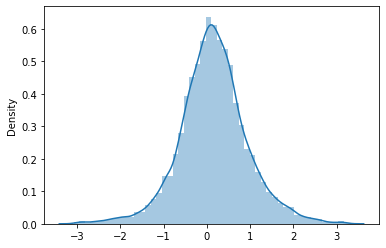

In [410]:
sns.distplot(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))

### 5. Lasso Regression

In [350]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

In [351]:
lasso = Lasso()
parameters = {'alpha' :[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 10, 20, 30, 30, 50]}
lasso_regressor = RandomizedSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1547.9248811997495, tolerance: 7.1681479034265285
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2867.7552705082853, tolerance: 7.230973398886745
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3385.8777035645617, tolerance: 7.381729468537824
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site

RandomizedSearchCV(cv=5, estimator=Lasso(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 10, 20, 30, 30,
                                                  50]},
                   scoring='neg_mean_squared_error')

In [352]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.4632576553859652


In [353]:
y_pred = lasso_regressor.predict(X_train)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_train.reshape(len(y_train),1))),1))

[[184. 222.]
 [180. 222.]
 [180. 222.]
 ...
 [150. 111.]
 [149. 111.]
 [152. 111.]]


In [354]:
cv_lasso = cross_val_score(estimator = lasso_regressor, X=X_train, y=y_train, cv=5)
lasso_rmse = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_train)))
lasso_r2_score = lasso_regressor.score(X_train,y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288.5680443393721, tolerance: 5.746895748694049
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2637.138937360138, tolerance: 5.690625062682204
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2675.795297989567, tolerance: 5.742291904913737
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-pa

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261.590266223102, tolerance: 6.086224265962967
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466.0780044516978, tolerance: 5.763641392074482
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.3302712205077, tolerance: 6.171055267966498
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-pac

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1902.9986803346765, tolerance: 5.4212855475407515
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1497.2127922722448, tolerance: 5.73957231700541
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1344.5149028947217, tolerance: 5.756626116332555
  model = cd_fast.enet_coordinate_descent(
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-

In [355]:
y_pred = lasso_regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[150. 165.]
 [149. 165.]
 [152. 165.]
 ...
 [168. 157.]
 [164. 157.]
 [164. 157.]]


In [356]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_test))))
print('R2_score: ', lasso_regressor.score(X_test,y_test))

RMSE:  20.462763623951957
R2_score:  -0.5043970176594624


C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>,
 array([[165.],
        [165.],
        [165.],
        ...,
        [157.],
        [157.],
        [157.]]))

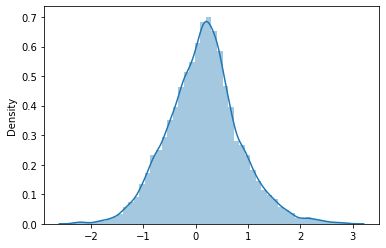

In [357]:
sns.distplot(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))

### 5. Support Vector Regression

In [358]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train, y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [359]:
y_pred = svr_regressor.predict(X_train)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_train.reshape(len(y_train),1))),1))

[[175. 222.]
 [160. 222.]
 [160. 222.]
 ...
 [114. 111.]
 [113. 111.]
 [114. 111.]]


In [360]:
cv_svr = cross_val_score(estimator = svr_regressor, X=X_train, y=y_train, cv=5)
svr_rmse = np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_train)))
svr_r2_score = svr_regressor.score(X_train,y_train)

C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [365]:
svr_r2_score

0.84782309582922

In [542]:
cv_svr

array([0., 0., 0., 0., 0.])

In [361]:
y_pred = svr_regressor.predict(X_test)
np.set_printoptions(precision=0)
print(np.concatenate((sc_y.inverse_transform(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))),1))

[[148. 165.]
 [147. 165.]
 [151. 165.]
 ...
 [154. 157.]
 [153. 157.]
 [154. 157.]]


In [363]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(sc_y.inverse_transform(y_pred),sc_y.inverse_transform(y_test))))
print('R2 score: ', svr_regressor.score(X_test,y_test))

RMSE:  27.12219813976485
R2 score:  0.07710685691904107


C:\Users\SHADOW\.conda\envs\ipl_prediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(<AxesSubplot:ylabel='Density'>,
 array([[165.],
        [165.],
        [165.],
        ...,
        [157.],
        [157.],
        [157.]]))

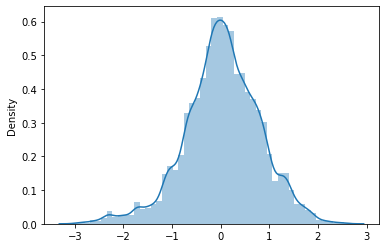

In [364]:
sns.distplot(y_pred.reshape(len(y_pred),1)), sc_y.inverse_transform(y_test.reshape(len(y_test),1))

## Model Selection

In [416]:
models=[
        ('Linear Regression', cv_linear.mean(), linear_rmse, linear_r2_score),
        ('Decision Tree Regression', cv_dt.mean(), dt_rmse, dt_r2_score),
        ('Random Forest Regression', cv_rf.mean(), rf_rmse, rf_r2_score),
        ('Ridge Regression', cv_ridge.mean(), ridge_rmse, ridge_r2_score),
        ('Lasso Regression', cv_lasso.mean(), lasso_rmse, lasso_r2_score),
        ('SVR Regression', cv_svr.mean(), svr_rmse, svr_r2_score)
        ]
compare = pd.DataFrame(data=models, columns=['Model','CV score', 'RMSE', 'R2 Score'])
compare

,Model,CV score,RMSE,R2 Score
0,Linear Regression,-1.400479e+24,17.255572,0.652089
1,Decision Tree Regression,2.521646e-01,0.157459,0.999971
2,Random Forest Regression,4.940022e-01,2.705358,0.991448
3,Ridge Regression,-3.985458e-01,17.251531,-0.347748
4,Lasso Regression,-4.632577e-01,19.055592,-0.437410
5,SVR Regression,2.601642e-01,11.239640,0.847823


Based on the above observations, the best model for the dataset is _Ridge Regression_ with
lowest RMSE of 20.3 and positive R2-score of 0.075

#### Creating a pickle file for saving the model. 

In [417]:
filename = 'ml_regression_predict.pkl'
pickle.dump(linear_regressor, open(filename, 'wb'))

In [261]:
filename = 'dt_regression_predict.pkl'
pickle.dump(dt_regressor, open(filename, 'wb'))

In [262]:
filename = 'rf_regression_predict.pkl'
pickle.dump(rf_regressor, open(filename, 'wb'))

In [263]:
filename = 'rg_regression_predict.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

In [264]:
filename = 'lasso_regression_predict.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))

In [ ]:
filename = 'svr_regression_predict.pkl'
pickle.dump(svr_regressor, open(filename, 'wb'))